In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file....
df=pd.read_csv('Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Uderstanding the Data                        
                                    
1) Features/Attributes:                
   >> 1) Gender                       
   >> 2) Married                           
   >> 3) Dependents                         
   >> 4) Education                     
   >> 5) Self_Employed                        
   >> 6) ApplicantIncome                      
   >> 7) CoapplicantIncome                     
   >> 8) LoanAmount                       
   >> 9) Loan_Amount_Term                  
   >> 10) Credit_History                     
   >> 11) Property_Area              
   >> 12) Loan_ID                    
   
2) Target/Label:               
   >> Loan_Status              
   
3) We have to predict Whether to give loan to a person or not. Thus it is a categorical data and i will use Logistic Regression    Model and Different Classification Models.                     

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 614 rows and 13 columns.
df.shape

(614, 13)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Features Information:                    
1) No null data.            
2) float datatype= 4                
3) int datatype= 1             
4) object datatype= 8       

In [6]:
df['Dependents'].values

array(['0', '1', '0', '0', '0', '2', '0', '3+', '2', '1', '2', '2', '2',
       '0', '2', '0', '1', '0', '0', '0', '0', '1', '0', '2', '1', '0',
       '0', '2', '0', '2', '1', '0', '1', '0', '3+', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '2', '1', '2', '0', '0', '1', '2', '0', '3+', '0', '1', '0',
       '0', '0', '1', '3+', '0', '0', '2', '0', '3+', '3+', '0', '0', '1',
       '3+', '3+', '0', '1', '2', '0', '1', '0', '2', '0', '0', '0', '0',
       '2', '2', '0', '0', '0', '0', '0', '0', '0', '2', '0', nan, '0',
       nan, '1', '2', '0', '2', '3+', '0', '0', '0', '1', '0', '1', '0',
       '1', '0', '0', nan, '0', '0', '2', '0', '0', '3+', '0', '1', '0',
       '0', '0', '0', '0', '0', '3+', '0', '2', '0', '2', '2', '0', '0',
       '0', '2', '0', '2', '1', '0', '0', '0', '0', '0', '2', '0', '3+',
       '1', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '0', '0',
       '2', '0', '3+', '3+', '0', '0', '0', '2', '3+

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in Loan_ID are 480 
Number of unique values in Gender are 2 
Number of unique values in Married are 2 
Number of unique values in Dependents are 4 
Number of unique values in Education are 2 
Number of unique values in Self_Employed are 2 
Number of unique values in ApplicantIncome are 405 
Number of unique values in CoapplicantIncome are 232 
Number of unique values in LoanAmount are 186 
Number of unique values in Loan_Amount_Term are 9 
Number of unique values in Credit_History are 2 
Number of unique values in Property_Area are 3 
Number of unique values in Loan_Status are 2 


In [10]:
# Statistical Features Information......
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


##### In Most Features Mean is  greater than the median thus we can say that data is  right skewed. 


In [11]:
# Checking the correlation.....
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


## Univariant Analysis

ApplicantIncome         AxesSubplot(0.125,0.71587;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
LoanAmount           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Credit_History         AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

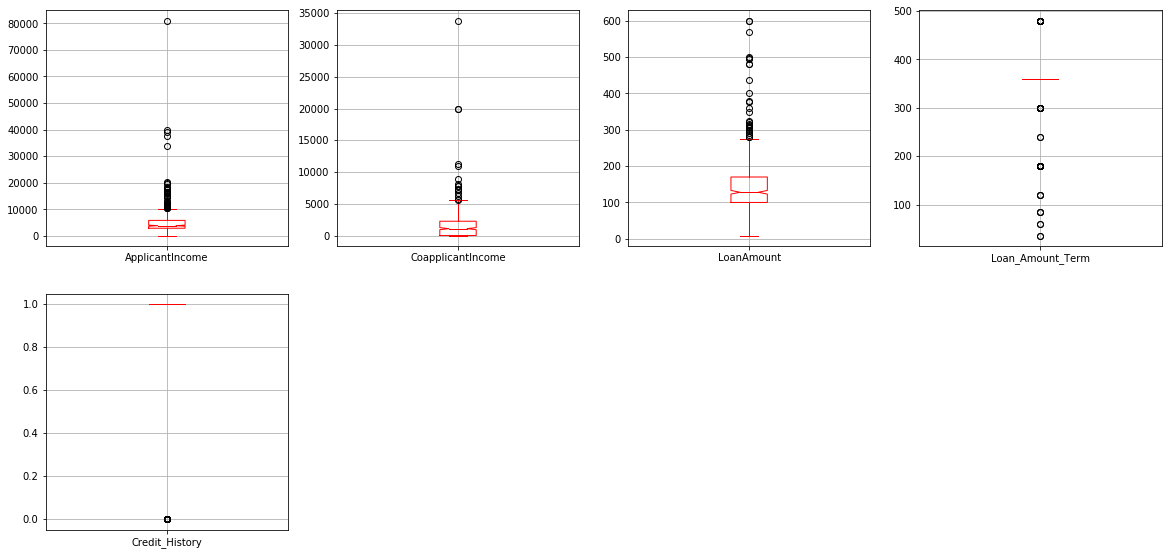

In [12]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002131CAA7088>,
      dtype=object)

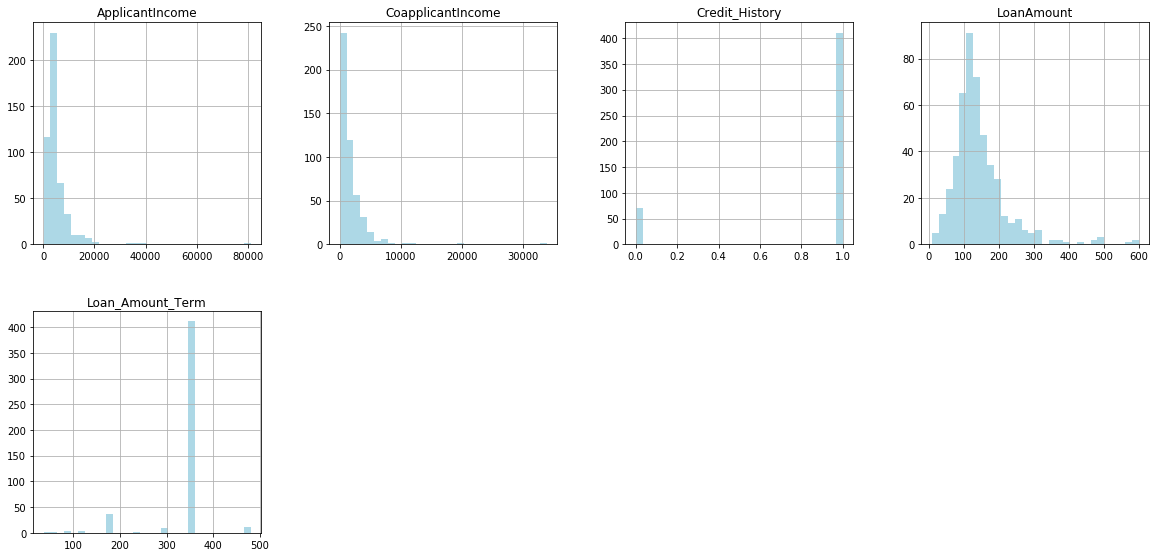

In [13]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30,color='lightblue') 

In [14]:
# Counting Number of persons having Salary below or more than 50K.......
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

Text(0.5, 6.79999999999999, 'Loan_Status')

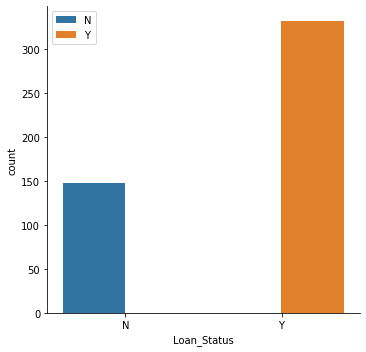

In [15]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='Loan_Status',data=df,kind='count',hue='Loan_Status')
plt.legend()
plt.xlabel("Loan_Status")
#here we we see data is imbalanced but both the classes have significant number of instances

# Bivariate Analysis

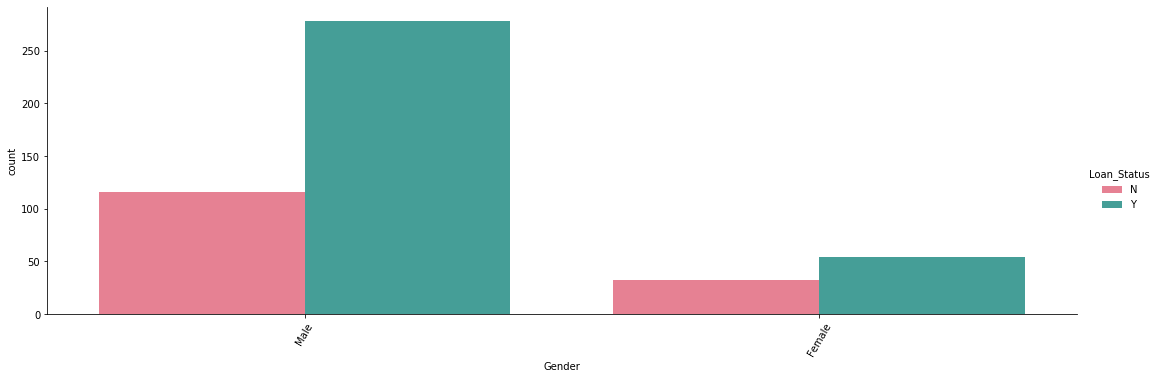

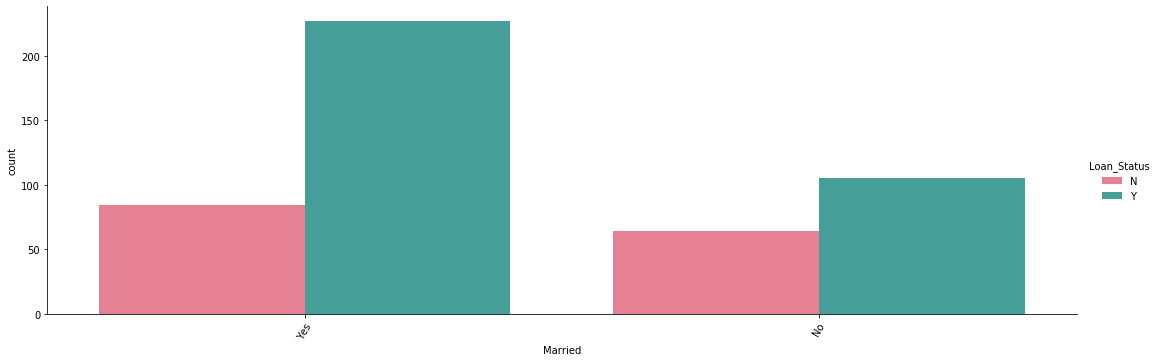

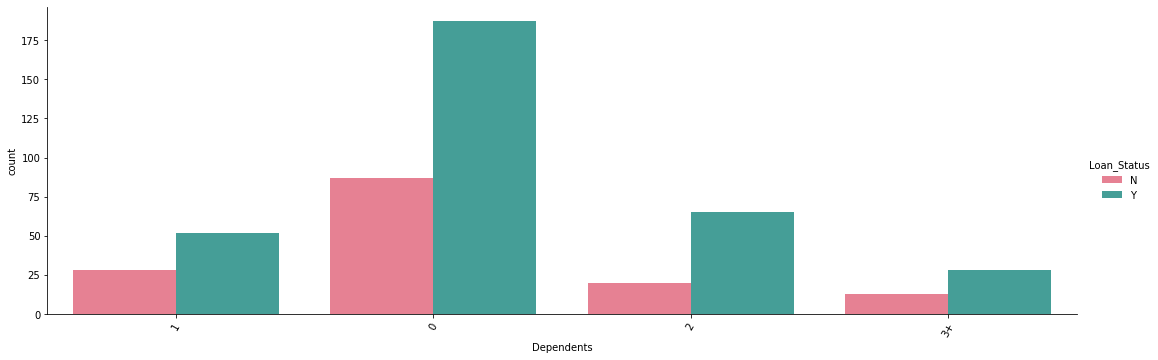

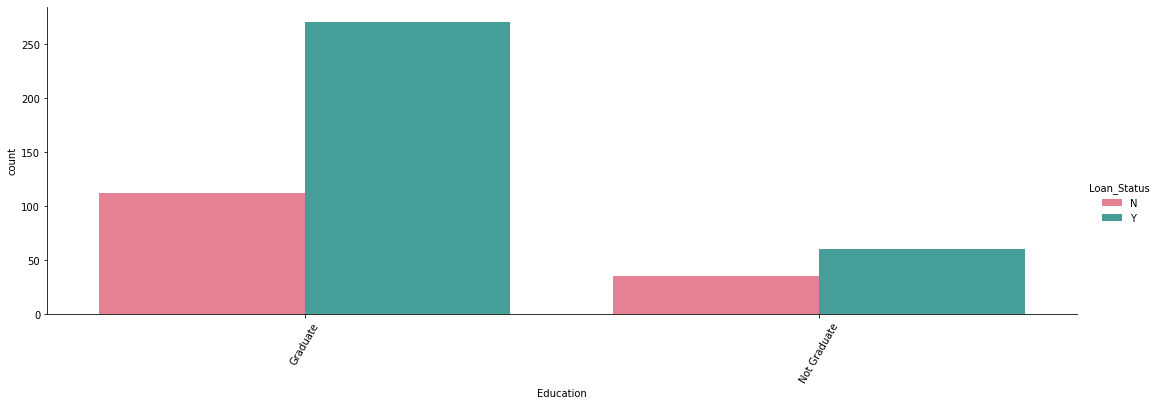

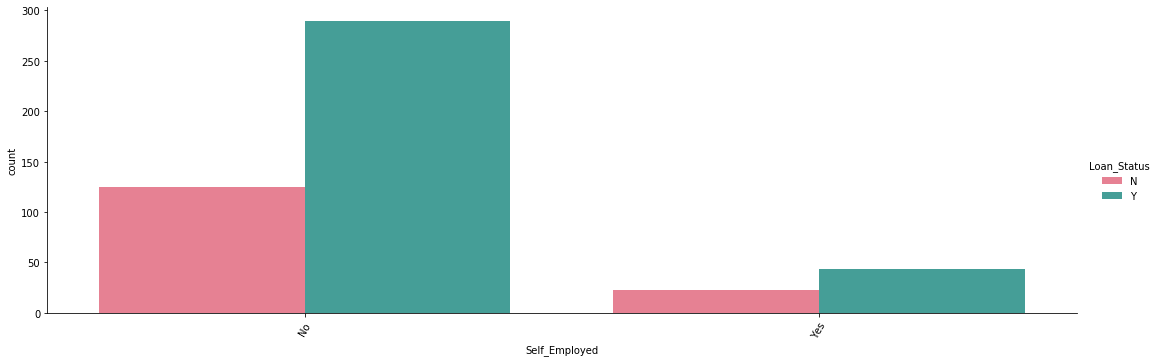

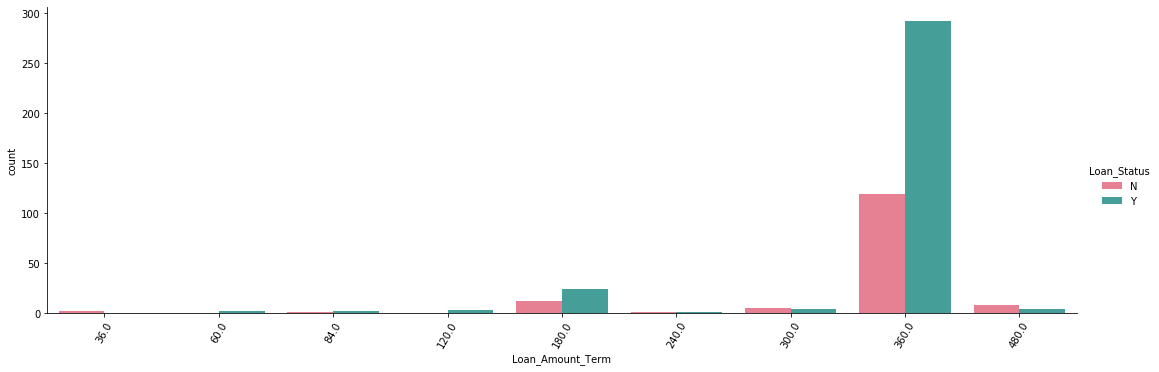

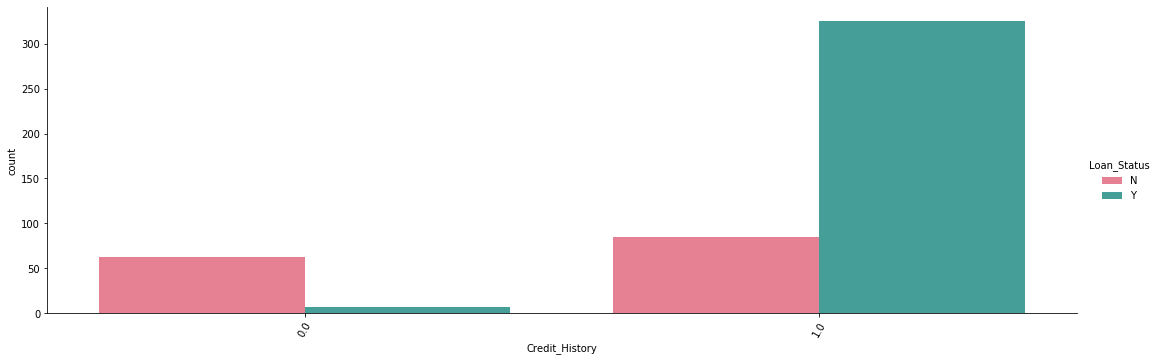

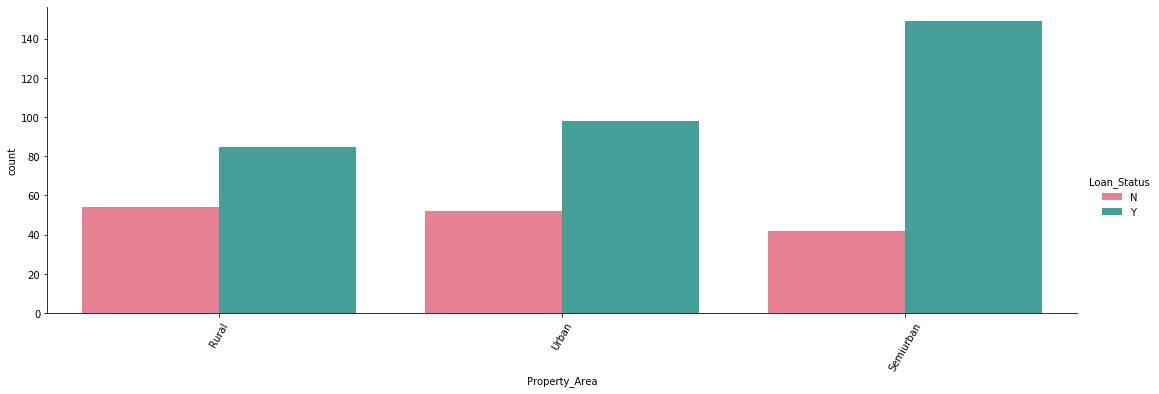

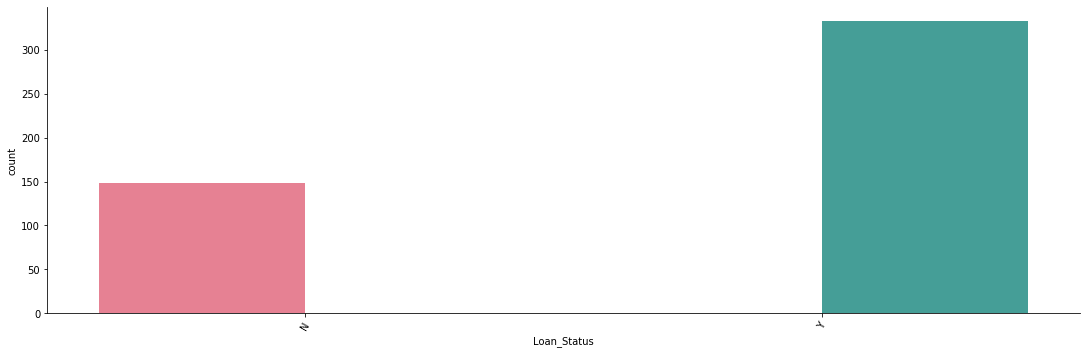

In [16]:
# For loop to Plot different graphs in a single run......   
for i in df.drop(['Loan_ID','LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1).columns.values:
    sns.catplot(x=i,kind='count',data=df,height=5,aspect=3,hue='Loan_Status',palette='husl')
    plt.xticks(rotation=60)

## Conclusion from the Graphs:                                
                        
1) Number of males who got loan are more than female.                             
2) Proportion of persons who are married and whose loan are accepted are more.                           
3) Proportion of persons who have less dependents  and whose loan request is accepted are more than and it keeps decreasing as     depenents increases.                       
4) Number of persons who are graduated and whose loan request are accepted are more in number.(Education is like an asset here     on which the person is assumed that whether he may repay or not.)                        
5) Mostle Loan requests of those who are not self employed are accepted.                              
6) Very few persons are there who have 0 credit score and whose loan request is accepted.                      
7) Large number of persons whose loan request is accepted are having a credit score of 1.                    
8) Loan request of those who have property in semiurban areas areaccepted more, after that those who have property in urban and   after that those who have property in rural areas.    

In [17]:
# Getting the mean values for further visualisaions...
df.groupby('Loan_Status')[['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History']].mean()

,LoanAmount,ApplicantIncome,CoapplicantIncome,Credit_History
Loan_Status,,,,
N,153.378378,5730.189189,1773.081081,0.574324
Y,140.882530,5201.093373,1495.508795,0.978916


##### we have got average values for some features, thus using these to plot some graphs...

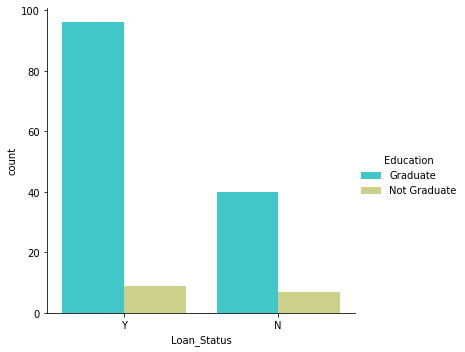

In [18]:
#Lets check loan status for applicant income greater than 5000
sns.catplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000],hue='Education',kind='count',palette='rainbow')
plt.show()

##### Number of persons who got loans are more who have salary greater than 5000 , also even if you have salary more than 5k doesn't mean your request will be accepted thus graduation also needed to be there.

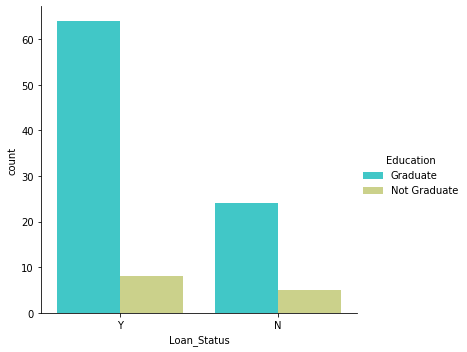

In [19]:
#Lets check what is the effect on above count if co-applicant income is 0
sns.catplot(x="Loan_Status",kind='count',data=df.loc[(df["ApplicantIncome"]>5000)&(df["CoapplicantIncome"]==0)],
            hue='Education',palette='rainbow')
plt.show()

##### As we see that after filtering with Coapplicantincome number of persons who got loan decreases.

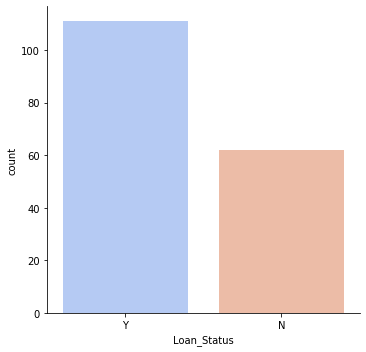

In [20]:
#  Graph between Loan status and Loan amount... 
sns.catplot(x="Loan_Status",data=df.loc[df["LoanAmount"]>145],kind='count',palette='coolwarm')

##### Number of persons whose loan amount is greater than 145 have more chances to get loan request accepted.

In [21]:
#sns.lineplot(x="ApplicantIncome",y='count')

In [22]:
# Using Label encoder to convert features values for further evaluation...
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List1=['Loan_ID','Gender','Married','Self_Employed','Dependents','Education','Property_Area','Loan_Status']
for i in List1:
    df[i]=le.fit_transform(df[i].astype(str))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
# Checking data types....
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [24]:
# Checking Skewness....
df.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [25]:
# Removing Skewness
for i in df.drop(['Loan_Status'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [26]:
# Checking skewness again....
df.skew()

Loan_ID              0.000000
Gender              -1.678471
Married             -0.621334
Dependents           0.604000
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      0.565144
CoapplicantIncome   -0.150104
LoanAmount          -0.375544
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [27]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(480, 13)
(460, 13)


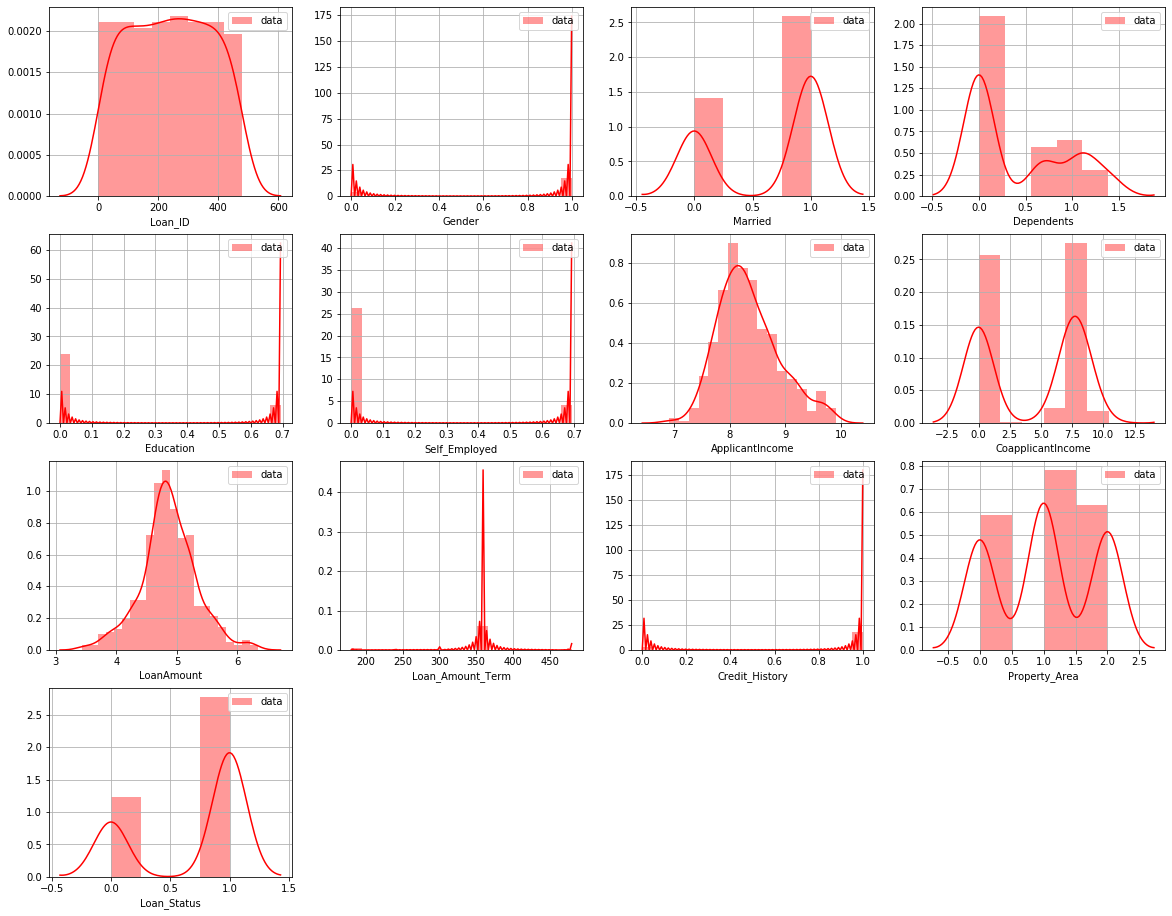

In [28]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

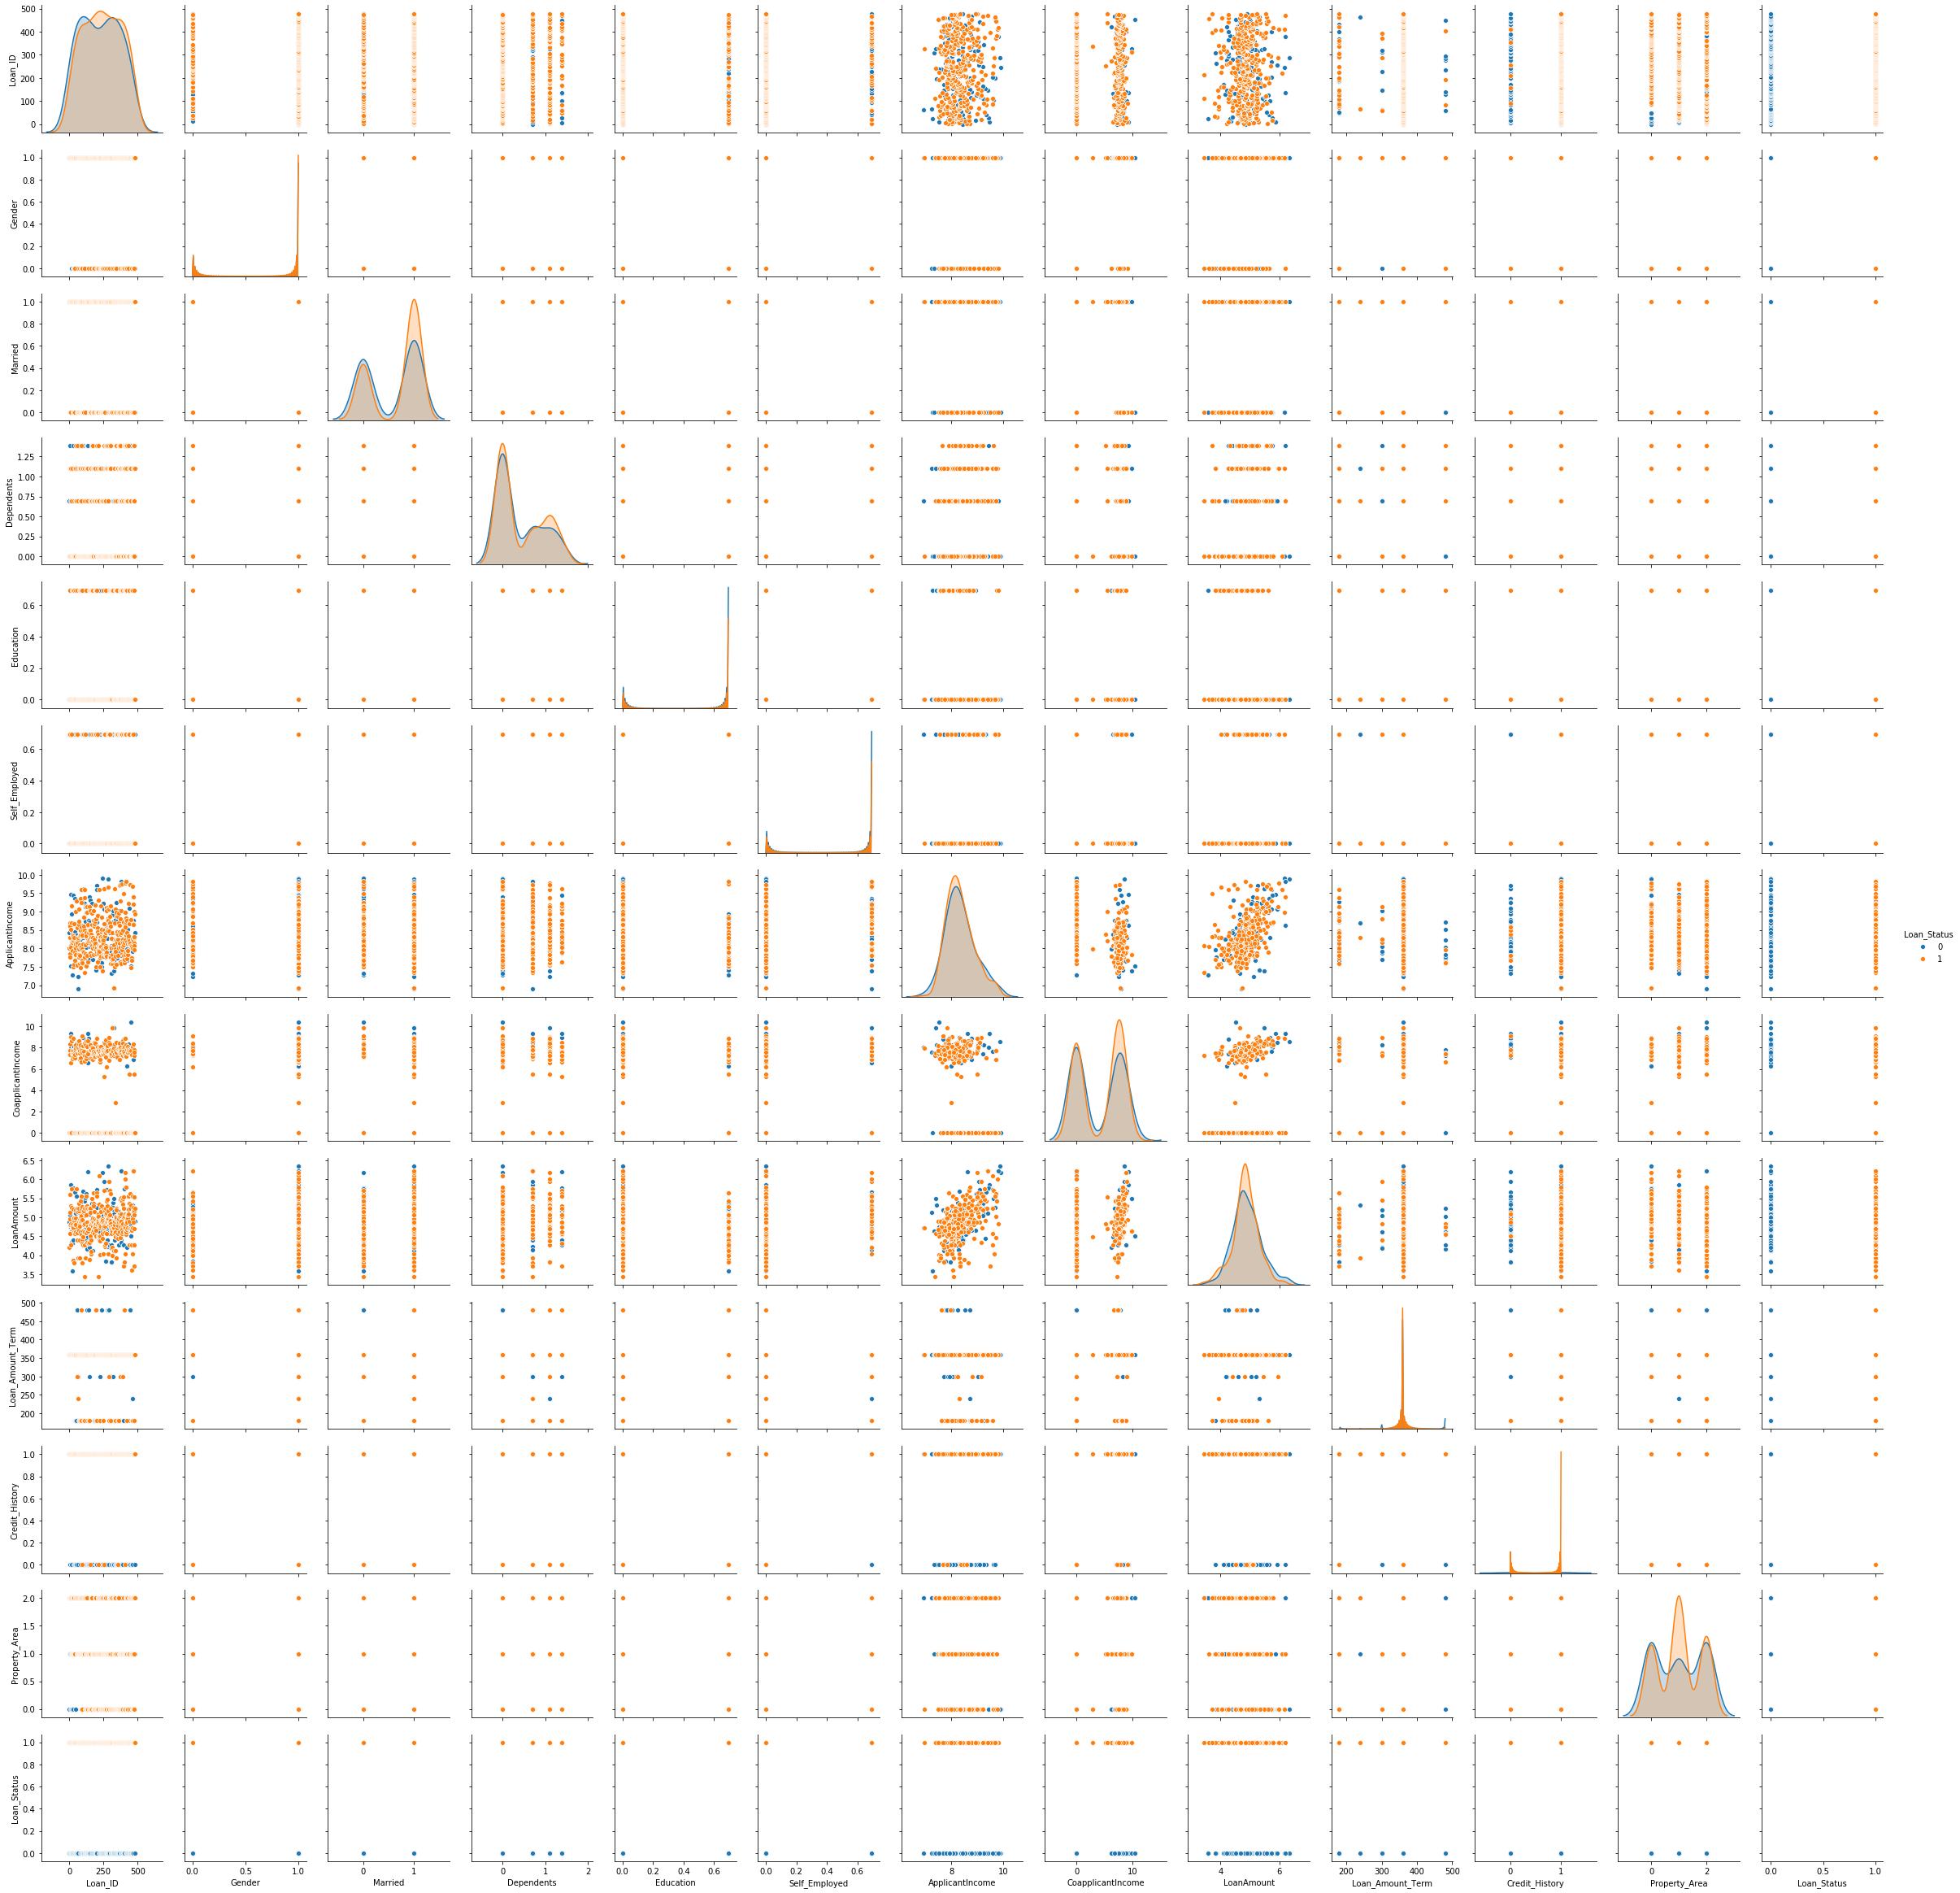

In [29]:
# Plotting Pairplot...
sns.pairplot(df_new,hue='Loan_Status')

In [30]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1,-0.00065,0.013,0.087,0.04,0.066,0.056,-0.051,0.038,-0.017,-0.025,-0.2,0.054
Gender,-0.00065,1,0.35,0.22,0.05,-0.0014,0.026,0.25,0.17,-0.11,0.033,-0.0018,0.064
Married,0.013,0.35,1,0.4,0.012,-0.0022,-0.014,0.32,0.21,-0.14,0.039,0.044,0.11
Dependents,0.087,0.22,0.4,1,0.03,0.062,0.12,0.043,0.16,-0.088,-0.0031,0.022,0.033
Education,0.04,0.05,0.012,0.03,1,-0.011,-0.19,0.053,-0.16,-0.1,-0.062,-0.063,-0.072
Self_Employed,0.066,-0.0014,-0.0022,0.062,-0.011,1,0.24,-0.073,0.12,-0.029,-0.033,-0.06,-0.055
ApplicantIncome,0.056,0.026,-0.014,0.12,-0.19,0.24,1,-0.36,0.52,-0.045,0.056,-0.056,-0.012
CoapplicantIncome,-0.051,0.25,0.32,0.043,0.053,-0.073,-0.36,1,0.19,-0.014,-0.011,-0.047,0.053
LoanAmount,0.038,0.17,0.21,0.16,-0.16,0.12,0.52,0.19,1,0.057,-0.012,-0.13,-0.058
Loan_Amount_Term,-0.017,-0.11,-0.14,-0.088,-0.1,-0.029,-0.045,-0.014,0.057,1,0.068,-0.028,-0.013


In [31]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['Loan_Status','Loan_ID'],axis=1)
x1
print(x1.shape)

(460, 11)


In [32]:
# Setting up the Target value in variable y.
y=df_new['Loan_Status']
y.shape

(460,)

In [33]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.462299,0.737309,0.516512,-0.506785,-0.394688,0.159978,0.784322,-0.016339,0.23724,0.416497,-1.310112
1,0.462299,0.737309,-0.807522,-0.506785,2.533645,-0.613933,-1.105067,-1.441763,0.23724,0.416497,1.254363
2,0.462299,0.737309,-0.807522,1.973225,-0.394688,-0.887246,0.899657,-0.155639,0.23724,0.416497,1.254363
3,0.462299,-1.356284,-0.807522,-0.506785,-0.394688,0.652053,-1.105067,0.192572,0.23724,0.416497,1.254363
4,0.462299,0.737309,1.291022,-0.506785,2.533645,0.465348,1.048380,1.574567,0.23724,0.416497,1.254363
...,...,...,...,...,...,...,...,...,...,...,...
455,-2.163102,-1.356284,-0.807522,-0.506785,-0.394688,-0.675846,-1.105067,-1.285162,0.23724,0.416497,-1.310112
456,0.462299,0.737309,1.840545,-0.506785,-0.394688,-0.040757,-1.105067,-2.510354,-3.17309,0.416497,-1.310112
457,0.462299,0.737309,0.516512,-0.506785,-0.394688,1.193901,0.310786,1.457828,0.23724,0.416497,1.254363
458,0.462299,0.737309,1.291022,-0.506785,-0.394688,1.079750,-1.105067,0.803140,0.23724,0.416497,1.254363


## Model Training


In [34]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [35]:
#.........Grid Search for DecisionTreeClassifier......
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')


{'criterion': 'entropy', 'max_depth': 5, 'random_state': 13}


In [36]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')


{'learning_rate': 0.01, 'n_estimators': 100}


In [37]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 7}


In [38]:
#.........Grid Search for SVC........
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy')

{'gamma': 0.001, 'random_state': 1}


In [39]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.01}


In [40]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,1000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'sqrt', 'n_estimators': 500}


In [41]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 200}


In [42]:
#........Defining Instances For Differnt Models.......
KNN=KNeighborsClassifier(n_neighbors=7)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=13)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 500,)
AD=AdaBoostClassifier(n_estimators=200)
XG=XGBClassifier()

In [43]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [44]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  50 is: 0.8586956521739131


Learning Score :  0.8125
Accuracy Score :  0.8586956521739131
Cross Val Score :  0.8219601192311646
roc auc score :  0.7779017857142857


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.84      0.98      0.91        64

    accuracy                           0.86        92
   macro avg       0.89      0.78      0.81        92
weighted avg       0.87      0.86      0.85        92



Confusion Matrix:
 [[16 12]
 [ 1 63]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.

Max Accuracy Score corresponding to Random State  50 is: 0.8695652173913043


Learning Score :  1.0
Accuracy Score :  0.8695652173913043
Cross Val Score :  0.7807462226333642
roc auc score :  0.7957589285714286


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.61      0.74        28
           1       0.85      0.98      0.91        64

    accuracy                           0.87        92
   macro avg       0.90      0.80      0.83        92
weighted avg       0.88      0.87      0.86        92



Confusion Matrix:
 [[17 11]
 [ 1 63]]







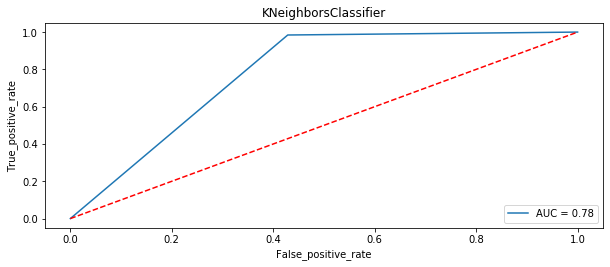

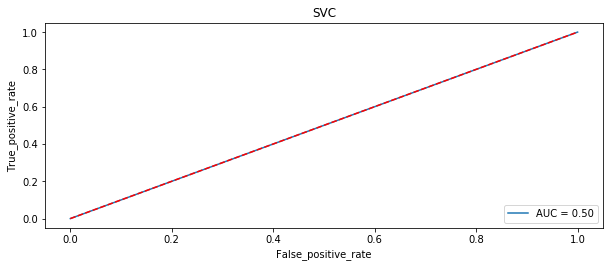

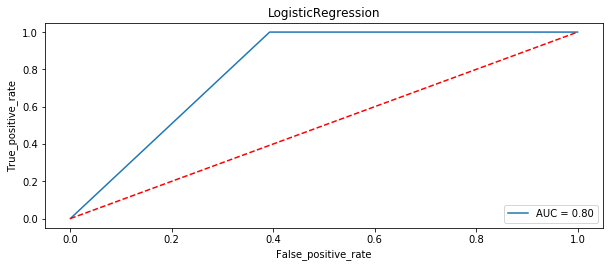

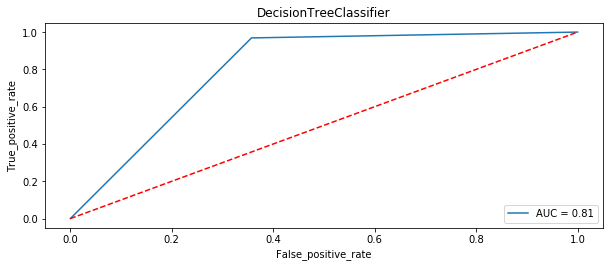

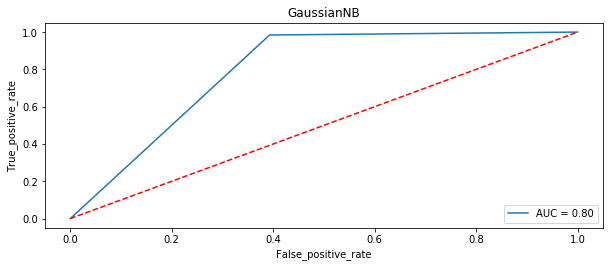

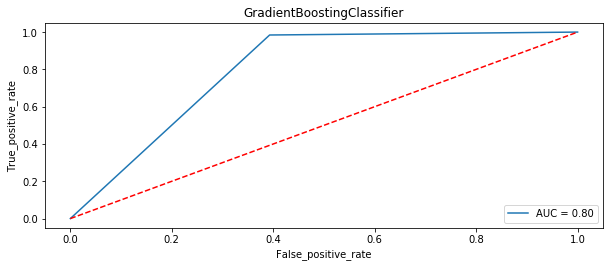

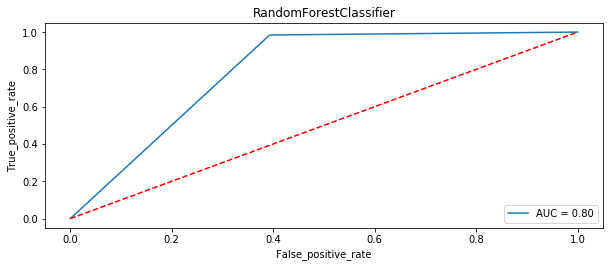

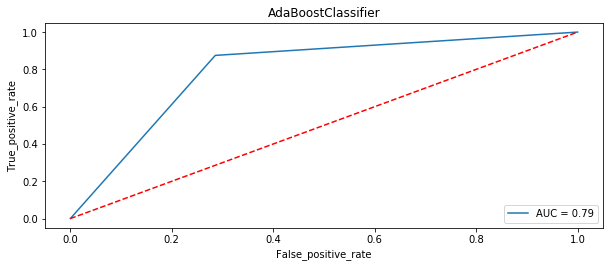

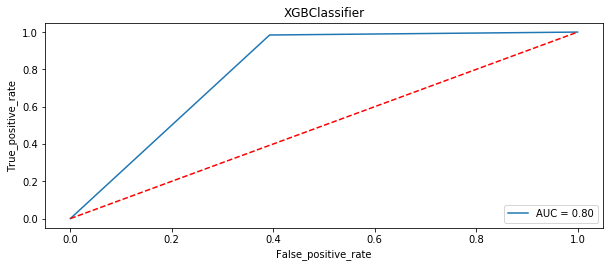

In [45]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [46]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,81.25,85.8696,82.196,77.7902
1,SVC,69.2935,69.5652,69.3496,50
2,LogisticRegression,79.6196,88.0435,81.3264,80.3571
3,DecisionTreeClassifier,84.2391,86.9565,80.4521,80.5804
4,GaussianNB,79.3478,86.9565,80.6743,79.5759
5,GradientBoostingClassifier,81.7935,86.9565,80.2347,79.5759
6,RandomForestClassifier,100,86.9565,81.3311,79.5759
7,AdaBoostClassifier,89.1304,82.6087,76.5382,79.4643
8,XGBClassifier,100,86.9565,78.0746,79.5759


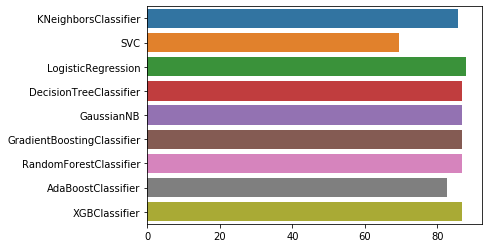

In [47]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## After all this process conclusion is that LogisticRegression is performing well

In [48]:
# Using LogisticRegression for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.20,stratify=y)
lr=LogisticRegression(C=0.01)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lrpred=lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lrpred))
print('Confusion Matrix:',confusion_matrix(y_test,lrpred))
print('Classification Report:','\n',classification_report(y_test,lrpred))

Accuracy Score: 0.8804347826086957
Confusion Matrix: [[17 11]
 [ 0 64]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76        28
           1       0.85      1.00      0.92        64

    accuracy                           0.88        92
   macro avg       0.93      0.80      0.84        92
weighted avg       0.90      0.88      0.87        92



(2.0, 0.0)

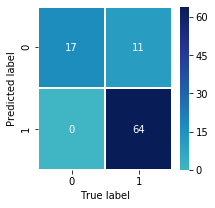

In [49]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, lrpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [50]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=lrpred
test
# On the lest side values are those which are taken by machine for test...

,Loan_Status,Predicted values
370,1,1
162,0,0
337,1,1
49,1,1
60,1,1
...,...,...
376,1,1
504,1,1
143,1,1
389,1,1


In [51]:
# Saving the Predicted values in csv file
test.to_csv('Project_12_Fraud_loan.csv') 

In [52]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(lr,'Project_12_Fraud_loan.pkl')

['Project_12_Fraud_loan.pkl']

## Conclusion:
                      
1) Number of males who got loan are more than female.                           
2) Proportion of persons who are married and whose loan are accepted are more.                    
3) Proportion of persons who have less dependents and whose loan request is accepted are more than and it keeps decreasing as depenents increases.            
4) Number of persons who are graduated and whose loan request are accepted are more in number.(Education is like an asset here on which the person is assumed that whether he may repay or not.)                    
5) Mostle Loan requests of those who are not self employed are accepted.                    
6) Very few persons are there who have 0 credit score and whose loan request is accepted.            
7) Large number of persons whose loan request is accepted are having a credit score of 1.                      
8) Loan request of those who have property in semiurban areas areaccepted more, after that those who have property in urban and after that those who have property in rural areas.  
9) Number of persons who got loans are more who have salary greater than 5000.                   
10) Number of persons whose loan amount is greater than 145 have more chances to get loan request accepted.       
                   
    
## Steps Followed:                    
1) Data Analysis.             
2) EDA Analysis.                      
3) Best parameters are found using Gridsearch cv and applied to models.                  
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.     
5) AUC ROC Curves are made for each model.              
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                       
7) LogisticRegression is used to train the model finally as it's accuracy score is best among the rest of the models.           
8) Predicted values are saved in Project_12_Fraud_loan.csv file.                 
9) Pickle file is named with Project_12_Fraud_loan.pkl             